## 7. Preparing Models

**Note: We hided Section 7.1. This section outlines the same data loading and cleaning steps as before. Due to resource limitations in the Colab environment, some models may not complete running. Therefore, we decided to reload the data and execute the models in the local environment of one of our team members.**

#### 7.1. Review dataset

In [ ]:
import pandas as pd

# File path
csv_file = r"C:\Users\pz980\Desktop\apartments_for_rent_classified_100K.csv"

# Load the CSV file with specified encoding and separator
df = pd.read_csv(csv_file, encoding='Windows-1252', sep=';')

# Display the first few rows
print(df.head())


           id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN        1.0   
4  This unit is located at 4805 Marquette NE, Alb...       NaN        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       1.0      USD  

C:\Users\pz980\AppData\Local\Temp\ipykernel_10576\54276864.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding='Windows-1252', sep=';')


We performed another round of data cleaning, following the same steps as before.

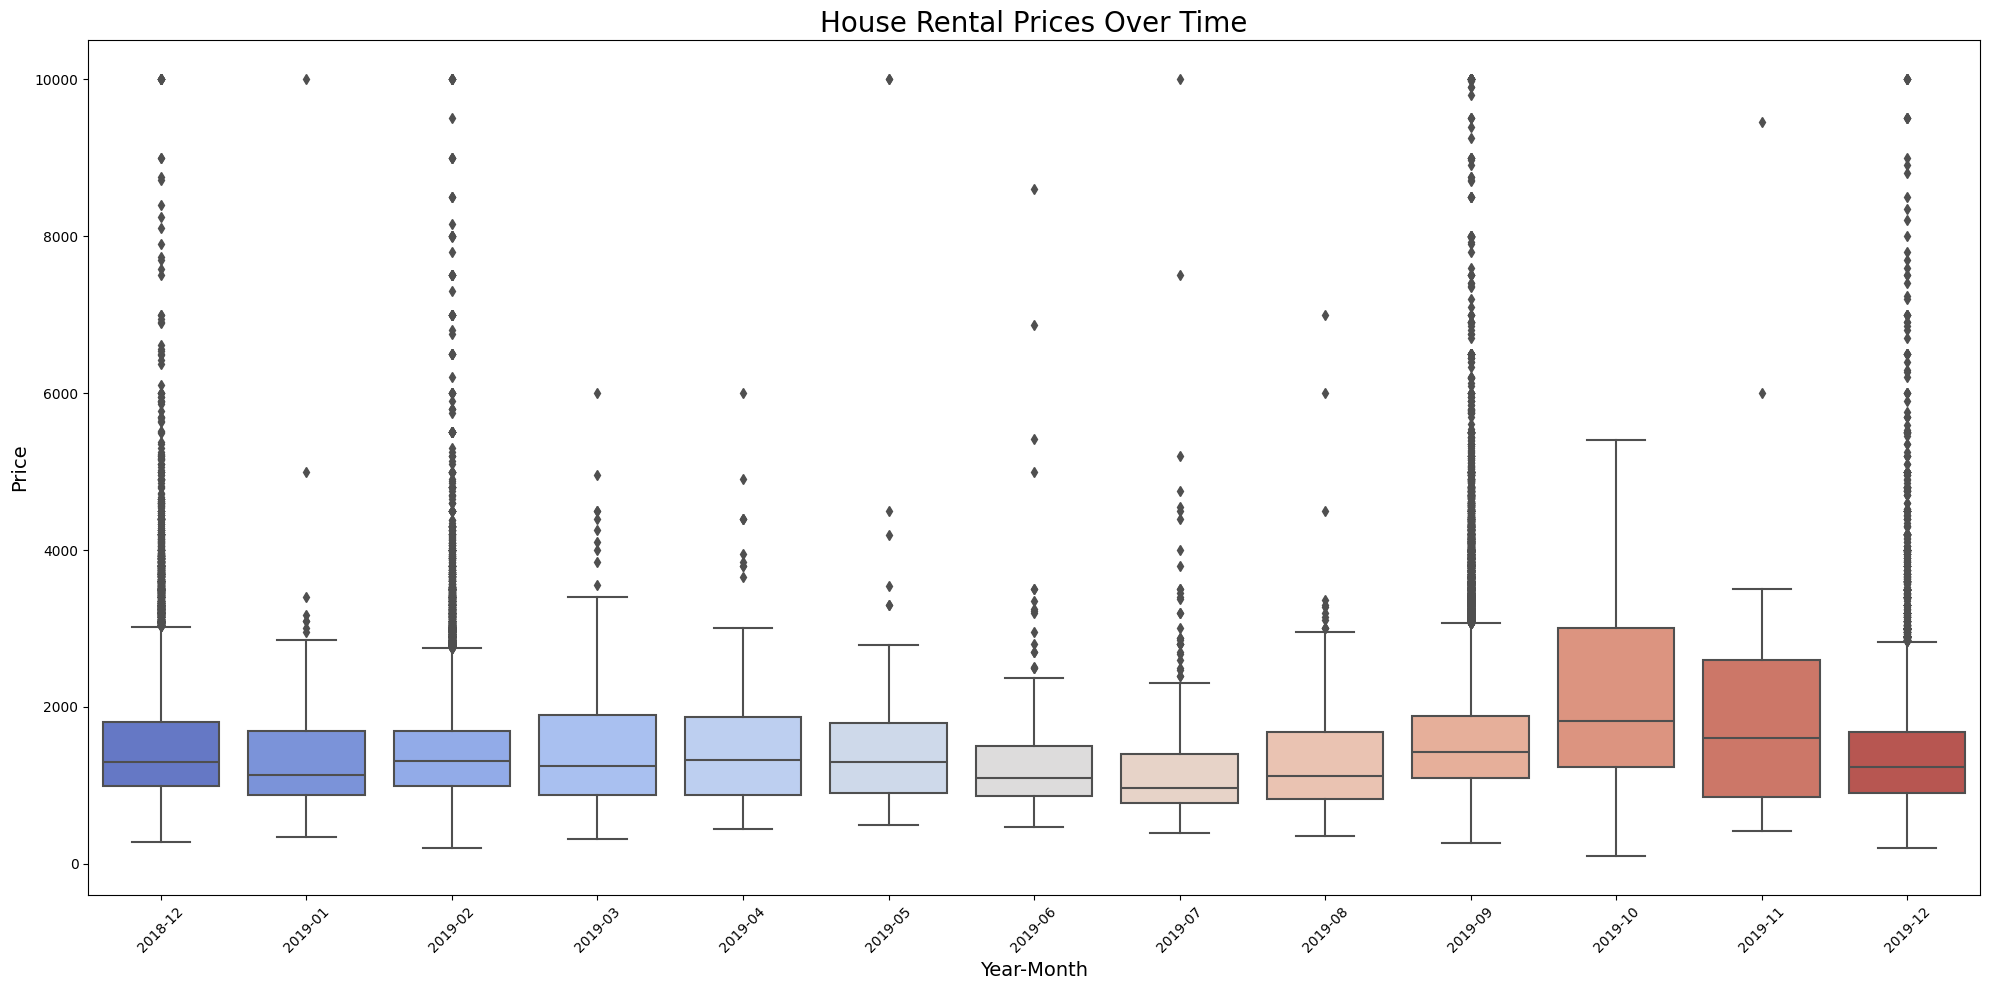

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['pets_allowed'].value_counts(dropna=False)
df = df[df['pets_allowed'] != 'Cats,Dogs,None']
df['pets_allowed'] = df['pets_allowed'].replace({'Cats': 1, 'Dogs': 1, 'Cats,Dogs': 1, 'None': 0}).fillna(0).astype(int)
df['pets_allowed'].value_counts(dropna=False)
df.dropna(subset=['longitude', 'latitude', 'cityname', 'price', 'price_display', 'bathrooms', 'bedrooms'], inplace=True)
unique_amenities = df['amenities'].dropna().unique()
amenity_scores = {
    'AC': 5, 'Alarm': 2, 'Basketball': 6, 'Cable or Satellite': 3, 'Clubhouse': 4,
    'Dishwasher': 2, 'Doorman': 8, 'Elevator': 7, 'Fireplace': 3, 'Garbage Disposal': 8,
    'Gated': 6, 'Golf': 10, 'Gym': 8, 'Hot Tub': 2, 'Internet Access': 7, 'Luxury': 9,
    'Parking': 4, 'Patio/Deck': 5, 'Playground': 3, 'Pool': 8, 'Refrigerator': 1,
    'Storage': 1, 'TV': 6, 'Tennis': 7, 'View': 5, 'Washer Dryer': 7, 'Wood Floors': 8
}
def calculate_amenity_score(amenities):
    if pd.isnull(amenities):
        return 0
    else:
        return sum(amenity_scores.get(amenity.strip(), 0) for amenity in amenities.split(','))

df['amenity_score'] = df['amenities'].apply(calculate_amenity_score)
df['amenity_score'].describe()
# Check for 'time' column and process it
if 'time' in df.columns:
    # Ensure 'time' is in datetime format
    df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')

    # Extract 'year' and 'month' columns
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month

    # Create 'rentalDate' column as 'YYYY-MM'
    df['rentalDate'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

    # Clip prices to a maximum of 10,000 for better visualization
    if 'price' in df.columns:
        df['price'] = df['price'].clip(upper=10000)

        # Ensure 'rentalDate' is sorted and all months are included
        rental_date_order = sorted(df['rentalDate'].unique())

        # Plot the boxplot
        plt.figure(figsize=(20, 10))
        plt.title('House Rental Prices Over Time', fontsize=20)
        sns.boxplot(
            data=df,
            x='rentalDate',
            y='price',
            palette="coolwarm",
            saturation=0.7,
            order=rental_date_order
        )

        # Format the plot
        plt.xticks(rotation=45, fontsize=10)
        plt.xlabel('Year-Month', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("The 'price' column is missing from the dataset.")
else:
    print("The 'time' column is missing from the dataset.")

#### 7.2. Preparing data for Modeling

In [ ]:
states1 = [
    "CA", "TX", "NY", "FL", "IL", "PA", "OH", "AZ", "NC",
    "VA", "GA", "MI", "MA", "IN", "UT", "NJ", "MN"
]
states1

['CA',
 'TX',
 'NY',
 'FL',
 'IL',
 'PA',
 'OH',
 'AZ',
 'NC',
 'VA',
 'GA',
 'MI',
 'MA',
 'IN',
 'UT',
 'NJ',
 'MN']

In [ ]:
df = df[df['state'].isin(states1)]

filtered_dataset_info = {
    "Shape": df.shape,
    "Unique States": df['state'].unique()
}
filtered_dataset_info

{'Shape': (68736, 26),
 'Unique States': array(['CA', 'VA', 'NC', 'GA', 'MA', 'AZ', 'TX', 'IL', 'FL', 'PA', 'UT',
        'NJ', 'IN', 'OH', 'MI', 'MN', 'NY'], dtype=object)}

In [ ]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time', 'amenity_score',
       'year', 'month', 'rentalDate'],
      dtype='object')

In [ ]:
df1 = df[['bathrooms','bedrooms','fee','pets_allowed','price','price_type','square_feet','cityname','state',
       'latitude', 'longitude', 'amenity_score','year','month']]

In [ ]:
# Convert weekly prices to monthly and update the price_type to 'Monthly'
df1.loc[df1['price_type'] == 'Weekly', 'price'] *= 4
df1.loc[df1['price_type'] == 'Weekly', 'price_type'] = 'Monthly'

In [ ]:
df1['fee'] = df1['fee'].replace({'Yes': 1, 'No': 0}).astype(int)

C:\Users\pz980\AppData\Local\Temp\ipykernel_10576\4038639986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fee'] = df1['fee'].replace({'Yes': 1, 'No': 0}).astype(int)


In [ ]:
df1.shape

(68736, 14)

In [ ]:
df1 = df1[((df1['bathrooms'] == 1.0) | (df1['bathrooms'] == 2.0)) &((df1['bedrooms'] == 1.0) | (df1['bedrooms'] == 2.0) | (df1['bedrooms'] == 3.0))]
df1 = df1[(df1['price'] >= 600) & (df1['price'] <= 6000)]
df1.shape

(61974, 14)

In [ ]:
df2 = df1[['bathrooms','bedrooms','fee','pets_allowed','price','price_type','square_feet','cityname','state',
       'latitude', 'longitude', 'amenity_score','year','month']]
df2['bathrooms_per_bedroom'] = df2.apply(
    lambda row: row['bathrooms'] if row['bedrooms'] == 0 else row['bathrooms'] / row['bedrooms'],
    axis=1
)

**Summary:**  
In this section, we filter the dataset to include only the states we are analyzing, such as CA, VA, NC, and GA. Next, we select the columns necessary for modeling and standardize rental prices by converting all weekly prices to monthly rates. The fee column is converted into a binary format, where "Yes" = 1 and "No" = 0. To focus on the most common room types and affordable options for students, we keep properties with 1-3 bedrooms, 1-2 bathrooms, and restrict the price range to 600-6,000 USD per month. Finally, we add a new column, `bathrooms_per_bedroom`, to calculate the ratio of bathrooms to bedrooms for each property.

## 8. Models

#### 8.1. Feature Selection

Pets Allowed vs Price p-value: 1.314975527453105e-42
Bedrooms (0 vs >0) vs Price p-value: nan
State vs Price p-value: 0.0
Month vs Price p-value: 1.5410234615631982e-51
Square Feet vs Price p-value: 0.0
Latitude vs Price p-value: 5.877268539896593e-289
Amenity Score vs Price p-value: 5.85846610831706e-38
State vs Pets Allowed p-value: 3.072811737684523e-238
City vs Pets Allowed p-value: 0.0


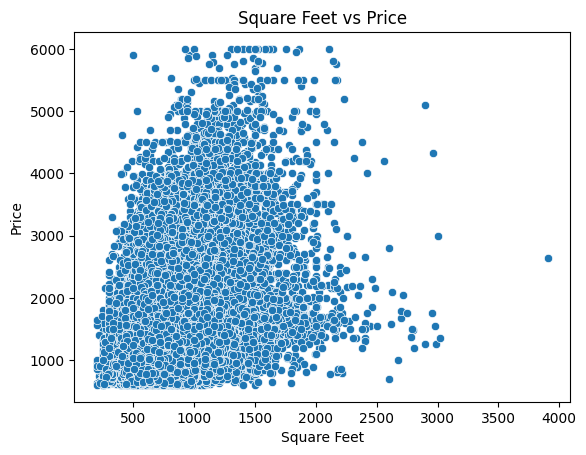

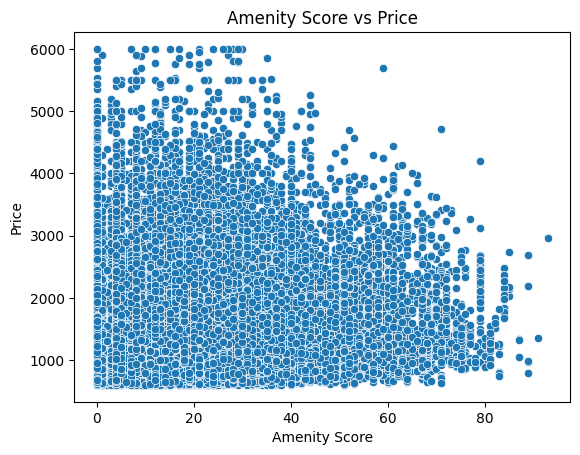

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, pearsonr
import pandas as pd

import matplotlib.pyplot as plt

# T-tests for price
pets_allowed = df2[df2.pets_allowed == 1]["price"]
no_pets = df2[df2.pets_allowed == 0]["price"]
_, p_value = ttest_ind(pets_allowed, no_pets)
print('Pets Allowed vs Price p-value:', p_value)

# T-tests for bedrooms
bedrooms_0 = df2[df2.bedrooms == 0]["price"]
bedrooms_1_plus = df2[df2.bedrooms > 0]["price"]
_, p_value = ttest_ind(bedrooms_0, bedrooms_1_plus)
print('Bedrooms (0 vs >0) vs Price p-value:', p_value)

# ANOVA for state on price
state_groups = [df2[df2.state == state]["price"] for state in df2.state.unique()]
_, p_value = f_oneway(*state_groups)
print('State vs Price p-value:', p_value)

# ANOVA for month on price
month_groups = [df2[df2.month == month]["price"] for month in df2.month.unique()]
_, p_value = f_oneway(*month_groups)
print('Month vs Price p-value:', p_value)

# Pearson correlation for numerical variables
_, p_value = pearsonr(df2.square_feet, df2.price)
print('Square Feet vs Price p-value:', p_value)

_, p_value = pearsonr(df2.latitude, df2.price)
print('Latitude vs Price p-value:', p_value)

_, p_value = pearsonr(df2.amenity_score, df2.price)
print('Amenity Score vs Price p-value:', p_value)

# Chi-Square test for categorical variables
crosstab = pd.crosstab(df2['state'], df2['pets_allowed'])
_, p_value, _, _ = chi2_contingency(crosstab)
print('State vs Pets Allowed p-value:', p_value)

crosstab = pd.crosstab(df2['cityname'], df2['pets_allowed'])
_, p_value, _, _ = chi2_contingency(crosstab)
print('City vs Pets Allowed p-value:', p_value)


sns.scatterplot(x=df2["square_feet"], y=df2["price"])
plt.title("Square Feet vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.show()

sns.scatterplot(x=df2["amenity_score"], y=df2["price"])
plt.title("Amenity Score vs Price")
plt.xlabel("Amenity Score")
plt.ylabel("Price")
plt.show()

**Summary:**  
- The analysis reveals that rental prices are significantly influenced by several factors. Larger properties tend to have higher prices, while higher amenity scores show a slight positive association with price. Allowing pets(pet_allowed), regional differences (states) and seasonal trends (months), all with low p-value, show strong effects on price variability. Additionally, geographic location (latitude) plays a critical role, and categorical factors like state and pet policies exhibit significant relationships with price.
- We created extra columns through feature engineering to explore more factors in our analysis. If we only used the results from feature selection, we would have fewer features to work with. To make sure we capture all potential insights, we decided to keep all the features instead of limiting ourselves to just the selected ones.

#### 8.2. Prepare Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Define categorical pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)


def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

# Define ratio pipeline
ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, feature_names_out=ratio_name),
    StandardScaler()
)

# Define log transformation pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

# Define clustering pipeline for geospatial features
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, random_state=None):
        self.n_clusters = n_clusters
        self.random_state = random_state

    def fit(self, X, y=None):
        from sklearn.cluster import KMeans
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        return self.kmeans.transform(X)

cluster_simil = ClusterSimilarity(n_clusters=10, random_state=42)

# Define default numerical pipeline
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Combine preprocessing steps
preprocessing = ColumnTransformer([
    ("bathrooms_per_bedroom", ratio_pipeline, ["bathrooms", "bedrooms"]),
    ("log", log_pipeline, ["square_feet"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, ["cityname", "state", "price_type", "pets_allowed"]),
],
    remainder=default_num_pipeline
)


X = df2.drop(columns=["price"])
y = df2["price"]
preprocessed_X = preprocessing.fit_transform(X)


c:\Users\pz980\anaconda3\envs\three\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn import set_config
set_config(display="diagram")
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bathrooms_per_bedroom',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x000001ED136C8550>,
                                                                      func=<fun...
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['square_feet']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cityname', 'state', 'price_type',
                                  'pets_allowed'])])

1. The categorical pipeline imputes missing values in categorical features by using the most frequent category (strategy="most_frequent") and applies one-hot encoding to transform these features into binary columns, with unknown categories being ignored (handle_unknown="ignore").

2. The ratio pipeline calculates the ratio of two columns (bathrooms and bedrooms) using a custom function. Missing values are imputed with the median (strategy="median"), and the resulting ratios are scaled using a standard scaler for consistency.

3. The log transformation pipeline applies a logarithmic transformation (np.log1p) to the square_feet column to normalize skewed data. Missing values are imputed with the median, and the transformed values are scaled for uniformity across the dataset.

4. The geospatial clustering pipeline assigns cluster similarity scores to geospatial features (latitude and longitude) using KMeans clustering with a specified number of clusters (n_clusters=10) and a fixed random state (random_state=42) for reproducibility.

5. The default numerical pipeline handles all remaining numerical features by imputing missing values with the median and scaling them with a standard scaler to ensure consistent feature ranges.

**Summary:**  
In this part, we create a pipeline to prepare data for modeling. The pipeline handles categorical, numerical, and geospatial data through distinct transformations. For categorical features, missing values are imputed, and one-hot encoding is applied. Numerical features undergo imputation, log transformation, or ratio calculations (e.g., bathrooms per bedroom), followed by scaling. Geospatial features are clustered using KMeans to capture location-based patterns. The pipeline is visualized as a ColumnTransformer, showing each step's integration, ensuring all feature types are processed appropriately for the modeling task. After using the pipeline, we could ensures robust and consistent data preprocessing.

#### 8.3. Building Model

##### 8.3.1. Linear Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


X = df2.drop(columns=["price"])
y = df2["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

# Fit the Linear Regression model
linear = LinearRegression()
linear.fit(X_train_processed, y_train)

# Make predictions
y_pred = linear.predict(X_test_processed)
y_true = y_test

# Evaluate the model
print('Mean Squared Error: ', mean_squared_error(y_true, y_pred))
print('R-Squared: ', r2_score(y_true, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_true, y_pred)))

c:\Users\pz980\anaconda3\envs\three\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mean Squared Error:  131070.72875753338
R-Squared:  0.7460498154121126
Root Mean Squared Error:  362.0369162910509


In [ ]:
mse_linear = mean_squared_error(y_true, y_pred)
r2_linear = r2_score(y_true, y_pred)
rmse_linear = np.sqrt(mse_linear)

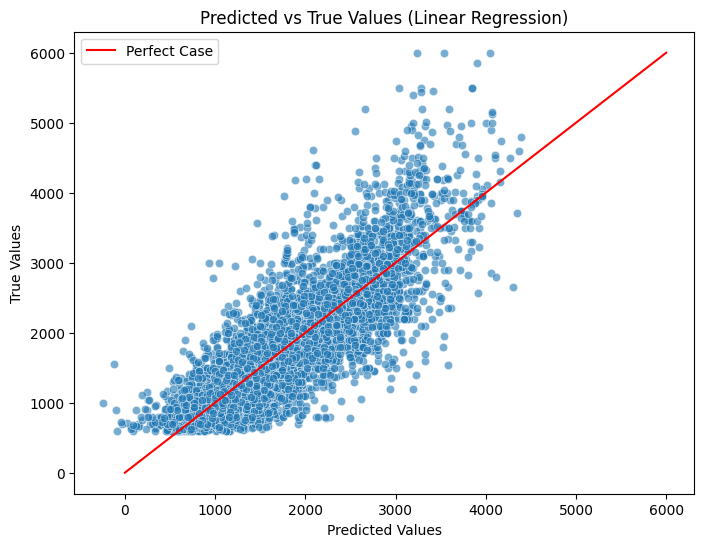

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_true, alpha=0.6)
plt.plot([0, max(y_true.max(), y_pred.max())], [0, max(y_true.max(), y_pred.max())],
         label='Perfect Case', color='red')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Predicted vs True Values (Linear Regression)')
plt.show()


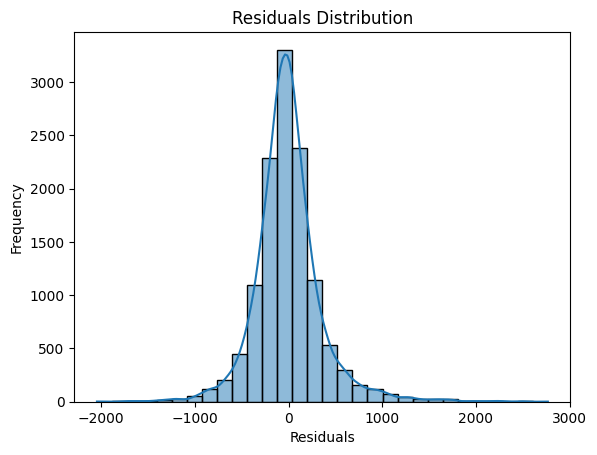

In [ ]:
residuals = y_true - y_pred
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Summary:**  
- In this section, we used a linear regression model to predict rental prices, after going through a detailed preprocessing pipeline.   
- The model performed decently, with an **R² score of 0.746**, meaning it explained about 74.6% of the variance in rental prices. The **Mean Squared Error (MSE) was about 131070.73**, and the **Root Mean Squared Error (RMSE) was about 362.04**.
- For the visualizations, we saw that most of the predicted values were pretty close to the actual ones, but there were some points that were off, showing prediction errors. The residuals were mostly centered around zero and seemed to follow a roughly normal distribution, suggesting the errors were fairly unbiased and consistent.
- Overall, **the model worked well**, but there’s still room for improvement.

##### 8.3.2. Decision Tree

c:\Users\pz980\anaconda3\envs\three\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cross-Validated R² Scores: [0.75641976 0.75103439 0.7427101  0.75342734 0.74434824]
Mean Cross-Validated R²: 0.7496
Standard Deviation of Cross-Validated R²: 0.0053
Mean Squared Error (MSE): 111817.31433238265
R² Score: 0.7833534009919181
Root Mean Squared Error (RMSE): 334.3909603030301


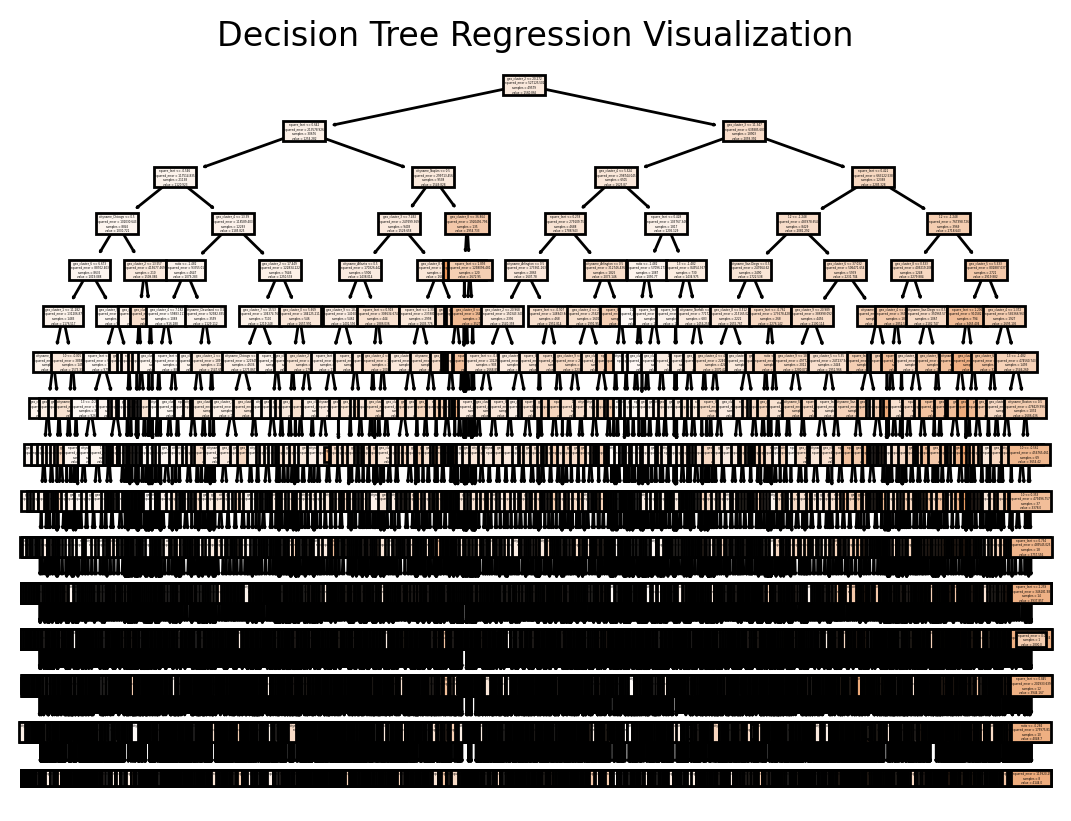

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np


X_train_prepd = preprocessing.fit_transform(X_train)
X_test_prepd = preprocessing.transform(X_test)


feature_names = []
for name, transformer, columns in preprocessing.transformers_:
    if name == "geo":

        feature_names.extend([f"geo_cluster_{i}" for i in range(10)])
    elif hasattr(transformer, "get_feature_names_out"):
        try:
            feature_names.extend(transformer.get_feature_names_out(columns))
        except ValueError:
            feature_names.extend(columns)
    else:
        feature_names.extend(columns)

# Perform cross-validation to evaluate the model
regressor = DecisionTreeRegressor(max_depth=15, random_state=42)  # Limit tree depth to 15 layers
cv_scores = cross_val_score(regressor, X_train_prepd, y_train, cv=5, scoring='r2')  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validated R² Scores: {cv_scores}")
print(f"Mean Cross-Validated R²: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validated R²: {std_cv_score:.4f}")

# Fit the Decision Tree Regressor
regressor.fit(X_train_prepd, y_train)

# Evaluate the model on the test data
y_pred = regressor.predict(X_test_prepd)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the Decision Tree
plt.figure(dpi=200)
plot_tree(regressor, filled=True, feature_names=feature_names)
plt.title("Decision Tree Regression Visualization")
plt.show()


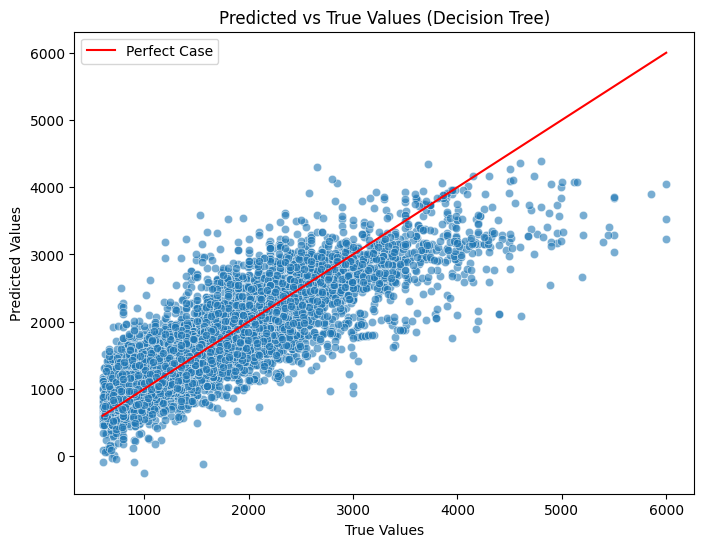

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Case')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (Decision Tree)')
plt.legend()
plt.show()


**Summary:**  
- We used a decision tree model to predict rental prices, which gave us an **R² score of about 0.783**, meaning it explained 78.3% of the variation in rental prices. The **Mean Squared Error (MSE) was about 111817.31**, and the **Root Mean Squared Error (RMSE) was 334.39**. To check how stable the model is, we did cross-validation, which showed a **mean R² of about 0.750** and a **low standard deviation of 0.0053**, confirming its reliability.
- For the Visualizations, it showed that most of the predicted values were close to the actual values, though there was some scatter, suggesting there’s still some variability in the predictions. The residuals were centered around zero, indicating the model’s errors were consistent.
- Overall, the **decision tree did a good job capturing rental price trends.**

##### 8.3.3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np


X_train_prepd = preprocessing.fit_transform(X_train)
X_test_prepd = preprocessing.transform(X_test)


rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)


cv_scores_rf = cross_val_score(rf_regressor, X_train_prepd, y_train, cv=5, scoring='r2')  # 5-fold cross-validation
mean_cv_score_rf = np.mean(cv_scores_rf)
std_cv_score_rf = np.std(cv_scores_rf)

print(f"Random Forest Cross-Validated R² Scores: {cv_scores_rf}")
print(f"Mean Cross-Validated R²: {mean_cv_score_rf:.4f}")
print(f"Standard Deviation of Cross-Validated R²: {std_cv_score_rf:.4f}")

# Fit the Random Forest Regressor
rf_regressor.fit(X_train_prepd, y_train)

# Evaluate the model on the test data
y_pred_rf = rf_regressor.predict(X_test_prepd)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R² Score:", r2_rf)
print("Random Forest Root Mean Squared Error (RMSE):", rmse_rf)


c:\Users\pz980\anaconda3\envs\three\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Random Forest Cross-Validated R² Scores: [0.85037673 0.86191488 0.84083448 0.85588846 0.85318858]
Mean Cross-Validated R²: 0.8524
Standard Deviation of Cross-Validated R²: 0.0069
Random Forest Mean Squared Error (MSE): 67994.6450101917
Random Forest R² Score: 0.8682600393313704
Random Forest Root Mean Squared Error (RMSE): 260.75782828170605


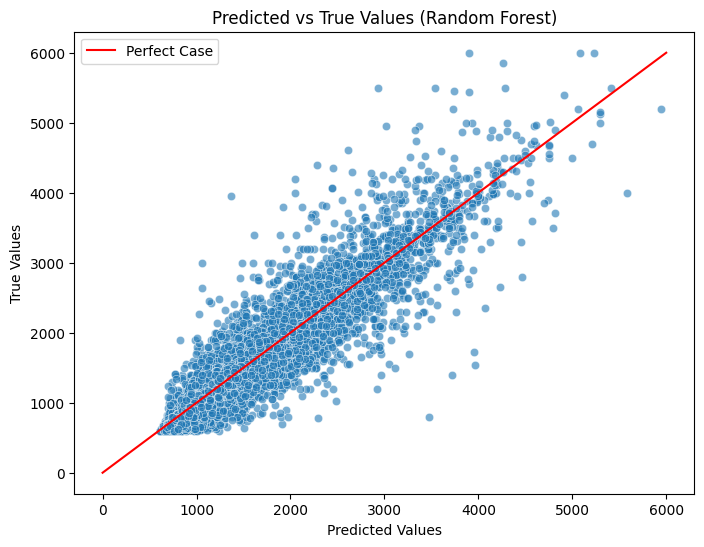

In [ ]:
# Scatter plot of predicted vs true values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=y_test, alpha=0.6)
plt.plot([0, max(y_test.max(), y_pred_rf.max())], [0, max(y_test.max(), y_pred_rf.max())],
         label='Perfect Case', color='red')
plt.legend()
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Predicted vs True Values (Random Forest)')
plt.show()


**Summary:**  
- The random forest model demonstrated strong performance in predicting rental prices. It achieved an **R² score of about 0.868**, explaining 86.8% of the variance in rental prices, with a **Mean Squared Error (MSE) of about 67,994.65** and a **Root Mean Squared Error (RMSE) of about 260.76**. Cross-validation further confirmed its reliability, with a **mean R² of 0.852** and a **low standard deviation of 0.0069**.
- Visualizations show that the predicted values closely align with the true values, and the residuals are small and evenly distributed, indicating high accuracy and consistent predictions. This highlights the **model is effective in capturing patterns in the rental price data**.

##### 8.3.4. K-Nearest Neighbour(K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Default is 5 neighbors
knn_regressor.fit(X_train_prepd, y_train)

# Predict and evaluate on test data
y_pred_knn = knn_regressor.predict(X_test_prepd)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)


print("KNN Regressor Mean Squared Error (MSE):", mse_knn)
print("KNN Regressor R² Score:", r2_knn)
print("KNN Regressor Root Mean Squared Error (RMSE):", rmse_knn)

KNN Regressor Mean Squared Error (MSE): 108039.87753771682
KNN Regressor R² Score: 0.7906722034458895
KNN Regressor Root Mean Squared Error (RMSE): 328.69420064509325


###### 8.3.4.1. Tune K-NN Model

The code below performs hyperparameter tuning by testing different values of k (1 to 20) for the K-Nearest Neighbors (KNN) regressor. For each value of k, the model's performance is evaluated using 5-fold cross-validation, and the mean R² score is calculated. The optimal k is determined as the value that achieves the highest cross-validated R² score. A plot is then generated to visualize the effect of different k values on model performance, highlighting the relationship between the number of neighbors and predictive accuracy.

Best k: 4 with Cross-Validated R²: 0.7742


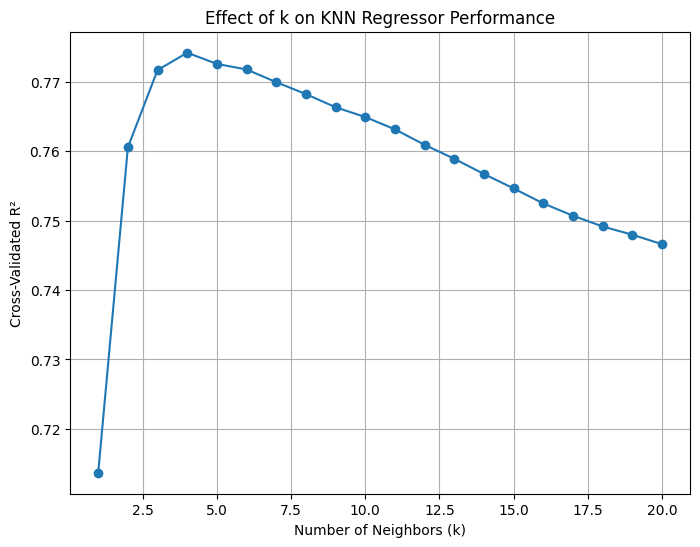

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Test different values for k
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_prepd, y_train, cv=5, scoring='r2')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k} with Cross-Validated R²: {max(cv_scores):.4f}")


plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated R²')
plt.title('Effect of k on KNN Regressor Performance')
plt.grid()
plt.show()


In [ ]:
# Fit the KNN model with k = 4
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train_prepd, y_train)


y_pred_knn = knn_regressor.predict(X_test_prepd)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")

KNN Regressor Performance:
Mean Squared Error (MSE): 106362.0445
Root Mean Squared Error (RMSE): 326.1319
R² Score: 0.7939


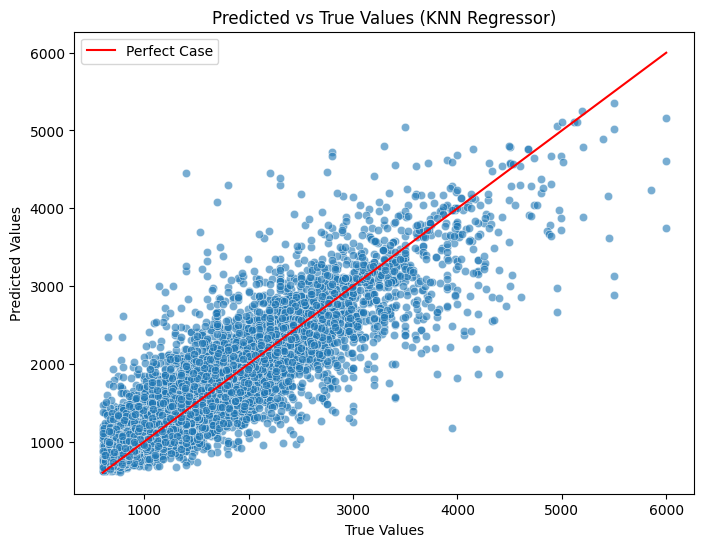

In [ ]:
# Fit the KNN model with k = 4
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train_prepd, y_train)


y_pred_knn = knn_regressor.predict(X_test_prepd)

# Scatter plot of predicted vs true values for KNN Regressor
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         label='Perfect Case', color='red')
plt.legend()
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values (KNN Regressor)')
plt.show()


**Summary:**  
- We used the K-Nearest Neighbors (KNN) model to predict rental prices, which gave us an **R² score of about 0.791**, meaning it explained 79.1% of the variation in rental prices. The **Mean Squared Error (MSE) was about 108039.88**, and the **Root Mean Squared Error (RMSE) was about 328.69**.
- Through cross-validation, we found that **4 neighbors was the optimal number**, and this resulted in a **R² of about 0.794**.
- Visualizations showed that the predicted values were generally close to the actual values, although there was some scatter, especially for extreme cases. The residuals were centered around zero and were fairly evenly distributed, suggesting that the predictions were unbiased and consistent.
- Overall, **the KNN model did a good job of capturing local patterns in the rental price data.**

#### 8.4. Model Comparison

After building four different types of models, we wanted to determine which one performed the best. To do this, we compared the models using key metrics like R², MSE, and RMSE. This allowed us to assess their accuracy, consistency, and reliability in making predictions. By analyzing these metrics, we were able to select the most robust and effective model for our task.

##### 8.4.1. $R^2$ Comparison

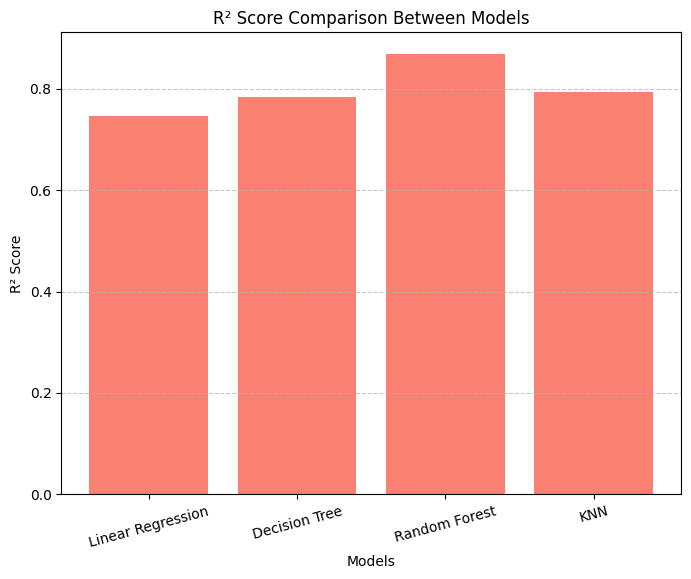

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']
mse_values = [mse_linear, mse, mse_rf, mse_knn]
rmse_values = [rmse_linear, rmse, rmse_rf, rmse_knn]
r2_values = [r2_linear, r2, r2_rf, r2_knn]

# Plot R² Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Score Comparison Between Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Summary:**  
- The $R^2$ comparison helps us understand how well each model predicts rental prices by explaining the variance in the data.
- **The random forest model had the highest $R^2$ score, showing the best overall performance**, followed by the KNN and decision tree models. The linear regression model performed slightly worse than the others.
- This comparison highlights the strengths of each model in capturing trends in the data, with **random forest being the most effective for predicting rental prices**.



##### 8.4.2. RMSE Comparison

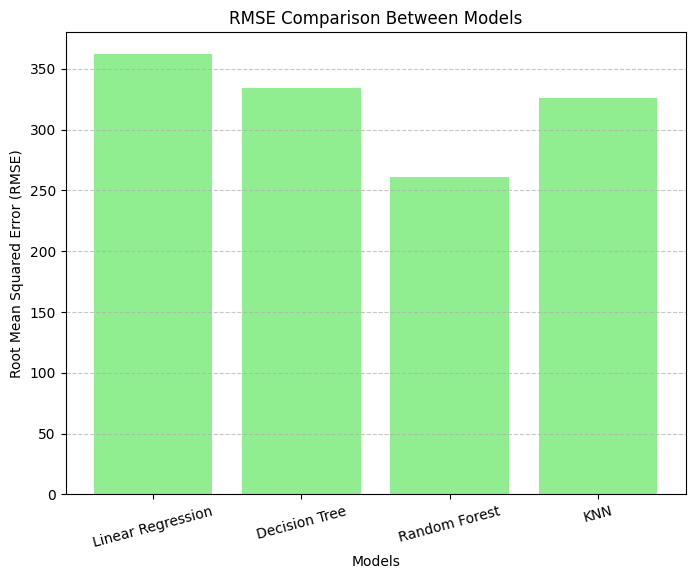

In [ ]:
# Plot RMSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Comparison Between Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Summary:**  
- The RMSE comparison helps evaluate the prediction errors of different models, with lower values indicating better performance.
- **The random forest model had the lowest RMSE, meaning it made the most accurate predictions.** The KNN and decision tree models had moderate RMSE values, while linear regression showed the highest error among all the models.
- This comparison highlights **the random forest model’s ability to minimize prediction errors and provide the most reliable rental price predictions.**

##### 8.4.3. MSE Comparison

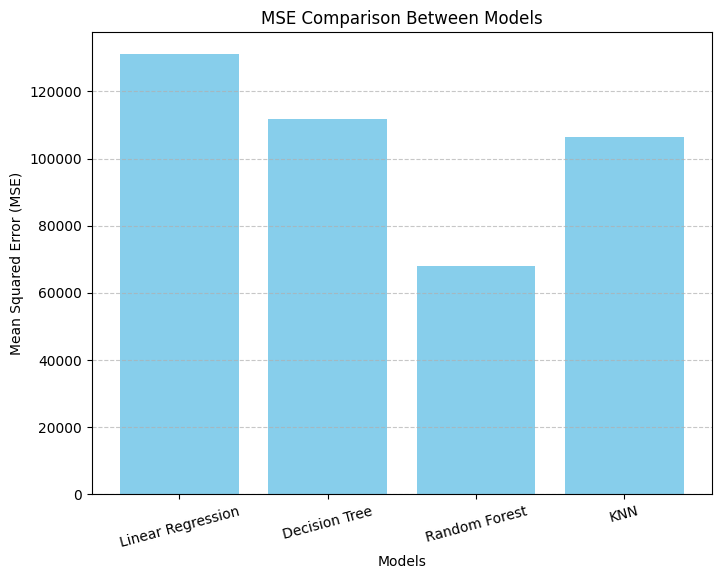

In [ ]:
# Plot MSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison Between Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Summary:**  
- The MSE comparison shows the average squared prediction error across models, with lower values indicating better performance.
- **The random forest model had the lowest MSE, which means it was the most accurate at capturing rental price patterns.** The KNN and decision tree models had moderate MSE values, while the linear regression model had the highest MSE, indicating larger prediction errors.

#### 8.5. Voting Regressor

The Voting Regressor is used to boost prediction accuracy and reliability by combining the strengths of several models. It takes predictions from different algorithms, like Linear Regression, Decision Tree, Random Forest, and KNN, and combines them to reduce the impact of errors from any one model. This approach helps improve accuracy, reduce overfitting, and provide more stable and consistent predictions.

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X_train_prepd = preprocessing.fit_transform(X_train)
X_test_prepd = preprocessing.transform(X_test)

# Individual regressors
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42, n_estimators=100)
knn = KNeighborsRegressor(n_neighbors=5)

# Voting Regressor
voting_regressor = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('rf', rf),
        ('knn', knn)
    ]
)

# Fit the Voting Regressor
voting_regressor.fit(X_train_prepd, y_train)


y_pred_voting = voting_regressor.predict(X_test_prepd)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)


print("Voting Regressor Performance:")
print(f"MSE: {mse_voting:.4f}")
print(f"RMSE: {rmse_voting:.4f}")
print(f"R² Score: {r2_voting:.4f}")


c:\Users\pz980\anaconda3\envs\three\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Voting Regressor Performance:
MSE: 74019.1048
RMSE: 272.0645
R² Score: 0.8566


**Summary:**  
- The Voting Regressor combines predictions from several models—Linear Regression, Decision Tree, Random Forest, and K-Nearest Neighbors—to improve overall performance. By using the strengths of each model, it merges their predictions into a final output.
- After applying the preprocessing pipeline, we trained and evaluated the Voting Regressor, which achieved an **MSE of 74019.1048**, an **RMSE of 272.0645**, and an **R² score of 0.8566**.
- These results show that **the Voting Regressor is effective at delivering accurate and reliable predictions, balancing the strengths of different models to make it a robust approach for predicting rental prices**.

## 9. Conclusion
- This project created a simple and effective way to predict rental prices in major U.S. cities using data processing, feature creation, and machine learning models. We found that important factors like apartment size, location, number of bedrooms and bathrooms, pet policies, and amenities have a big impact on rental prices. Seasonal trends and differences between cities also played a role in how much apartments cost.

- We cleaned and improved the data to make it more useful for the models. For example, we changed weekly prices into monthly rates, created an amenity_score to measure the value of amenities, and calculated a bathrooms_per_bedroom ratio to show the layout of properties. We focused on properties that are most useful for students, such as those with 1-3 bedrooms, 1-2 bathrooms, and prices between 600 and 6000 USD.

- We tested several machine learning models to predict prices. Linear regression was simple to use but did not handle complex patterns well, with an $R^2$ score of 0.746. The decision tree model did better with an $R^2$ score of 0.783, finding more patterns in the data. The random forest model worked the best, achieving an $R^2$ score of 0.868, as it handled complex relationships very well. K-Nearest Neighbors (KNN) also performed well with an $R^2$ score of 0.791 but had some trouble with outliers. Lastly, the Voting Regressor combined the strengths of all the models, giving a strong R² score of 0.857.


## 10. Recommendation

- **General Recommendations for Apartment Rental in the US:**

1. Best Time to Move In:  
Rental prices are more stable during the winter months but may have wider variations in summer. Moving during off-peak months (e.g., winter) could help students secure better deals.

2. Choose Affordable States and Cities:  
States like Indiana (IN), Michigan (MI), and Utah (UT) show lower median rental prices compared to high-demand states like California (CA) and New York (NY). Students should prioritize cities in these states for affordability.

3. Focus on Apartments with Fewer Bedrooms and Bathrooms:
 Apartments with 1-2 bedrooms and 1-2 bathrooms dominate the rental market and often fall within the 600-6000 USD range, making them suitable for students on a budget.

4. Prioritize Value Over Extra Amenities:  
Higher amenity_scores are associated with higher rental prices. Students should prioritize essential amenities over luxury ones to balance affordability and comfort.

5. Seasonal Variations in Massachusetts:  
Rental prices in Massachusetts show fluctuations throughout the year, with outliers in mid-2019. Students should monitor seasonal trends to identify the most cost-effective months for securing leases.

- **Recommendation for Utilize Models:**
1. If a student has a specific budget and wants to filter apartments based on certain criteria like city or apartment size, the Decision Tree model is the best choice. It works by splitting data into decision nodes and provides clear, tailored predictions.

2. For students who need to compare multiple factors, such as city, amenities, and square footage, the Random Forest model is ideal. By averaging predictions from multiple decision trees, it handles complex interactions between features effectively. This model provides robust and accurate results, making it useful for predicting likely price ranges.

3. If a student is looking for general trends in rental prices, the Linear Regression model is a good option.

4. For highly localized predictions, such as identifying prices for similar apartments in a neighborhood or city, the K-Nearest Neighbors (KNN) model works well.

## 11. Generative AI Disclosure


In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

1. Content Structuring and Idea Generation:  
ChatGPT helped organize the project structure and provided ideas for analyzing rental data, such as focusing on city-level comparisons, amenities, and seasonal trends.

2. Data Insights and Feature Engineering:  
ChatGPT assisted in identifying features like 'amenity_score' and 'bathrooms_per_bedroom' and provided clarification on dataset preprocessing steps.

3. Code Assistance and Debugging:  
ChatGPT provided guidance on building preprocessing pipelines, tuning hyperparameters, and optimizing model performance.

4. Writing and Proofreading:  
Tools like Grammarly and ChatGPT helped refine the language in our reports and ensure grammatic
All AI-assisted outputs were reviewed and validated by the team to maintain accuracy and originality.

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.